In [1]:
from base import *

# Different Learing Rate

## NN

> Learning Rate = 1e-2

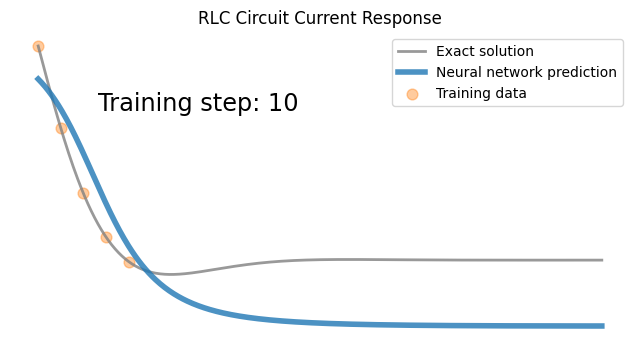

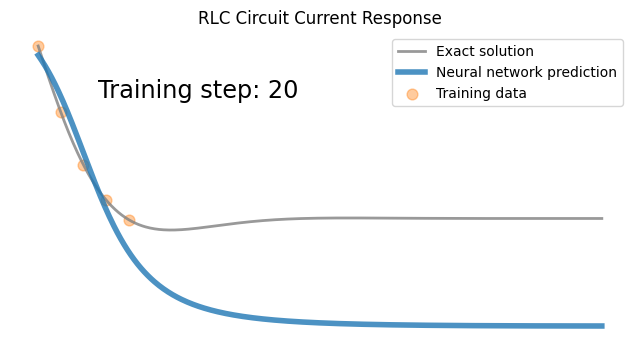

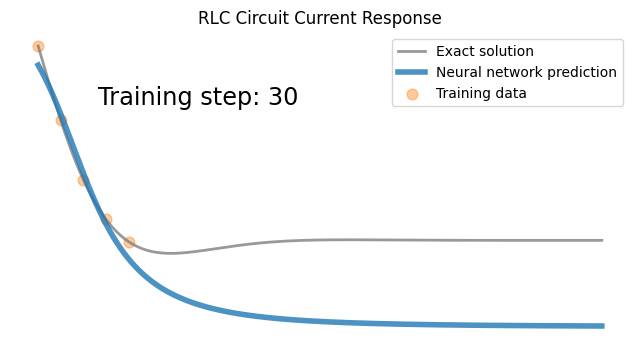

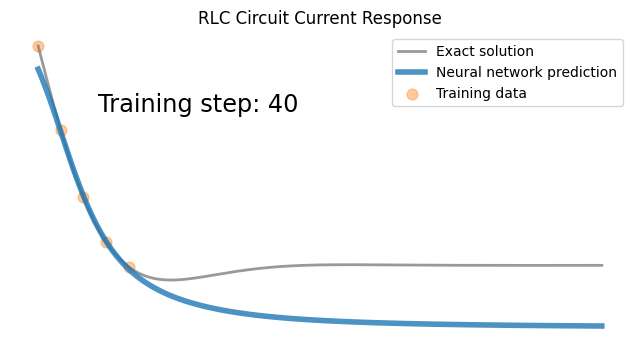

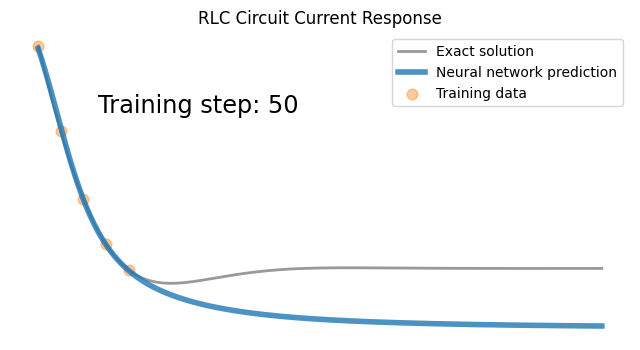

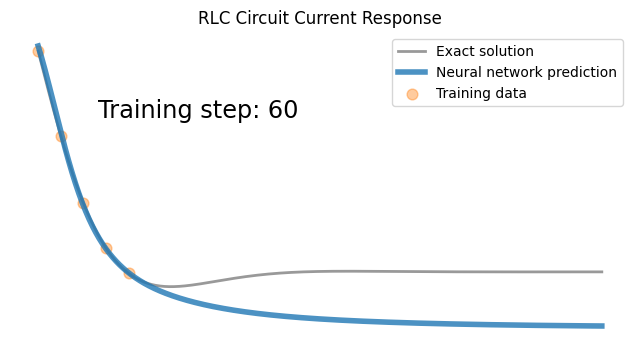

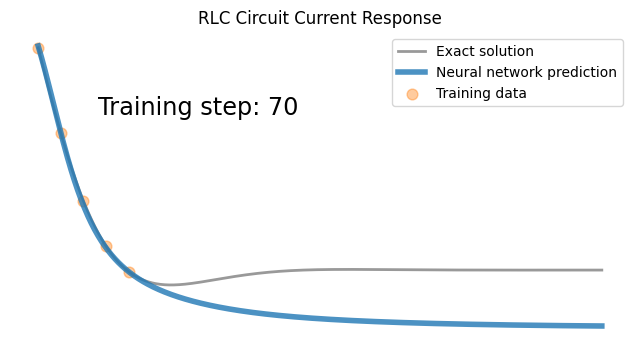

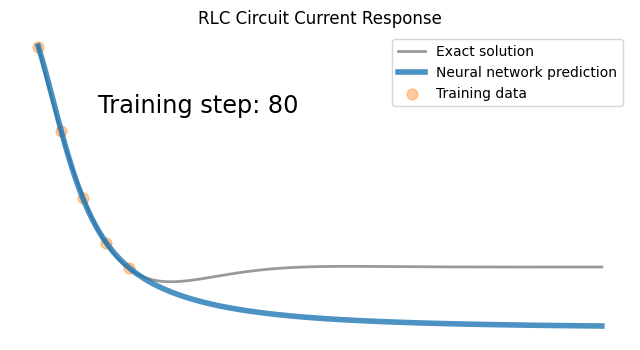

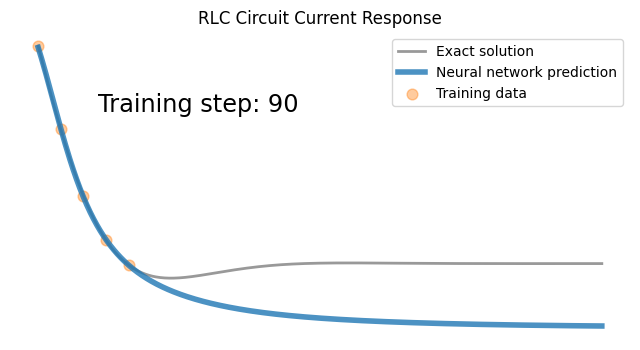

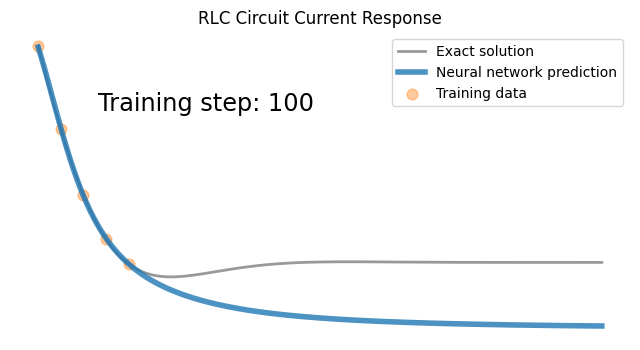

In [2]:
torch.manual_seed(123)

model = FCN(1, 1, 32, 3)
loss_fn = nn.MSELoss()
# Testing with 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for i in range(100):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 10 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

> Learing Rate = 1e-4

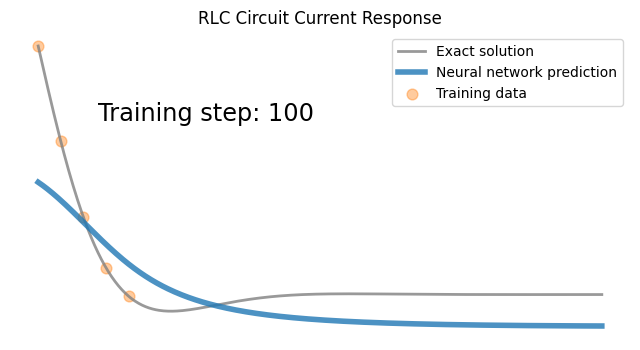

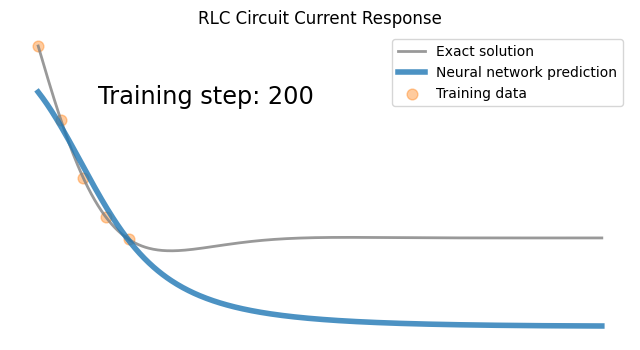

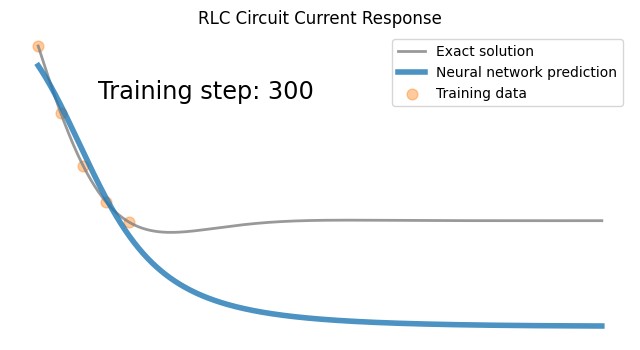

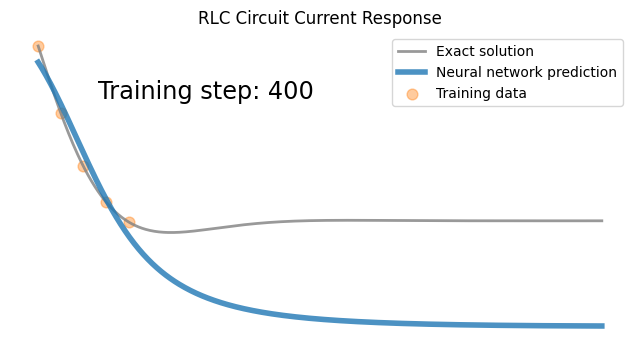

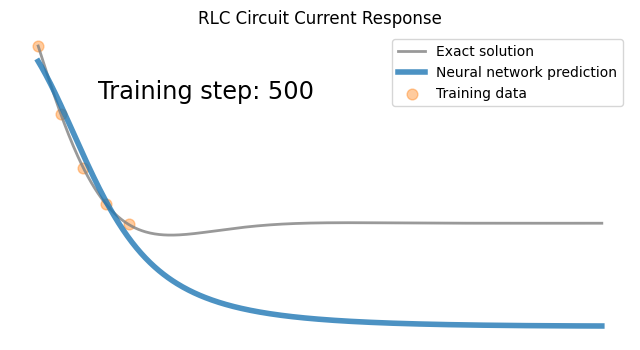

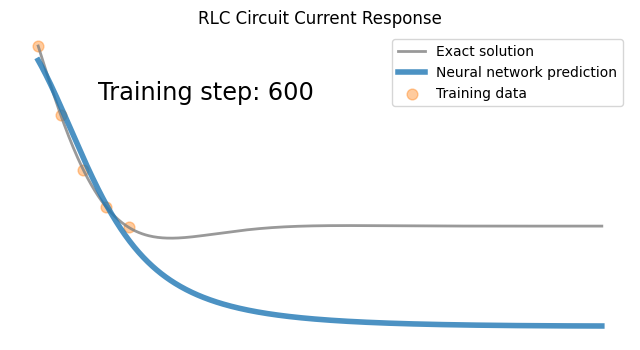

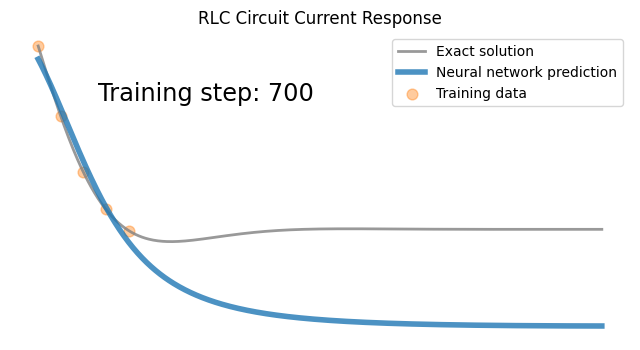

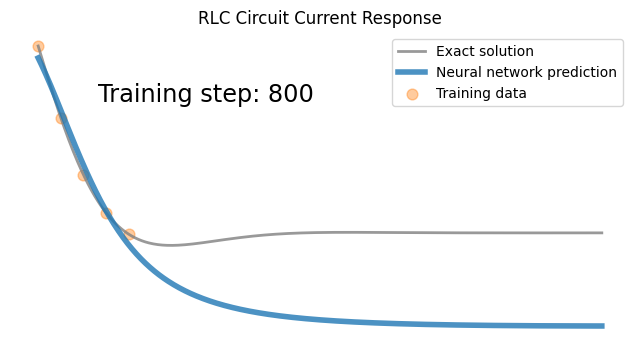

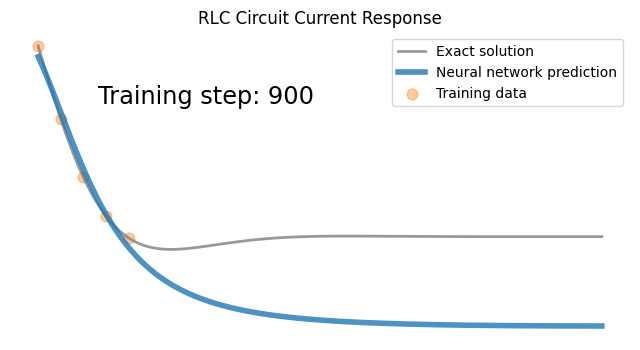

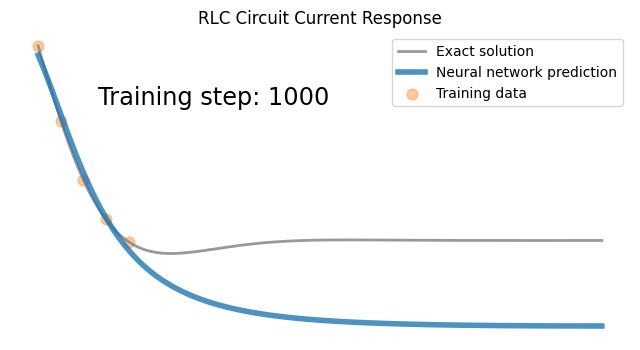

In [4]:
torch.manual_seed(123)

model = FCN(1, 1, 32, 3)
loss_fn = nn.MSELoss()
# Testing with 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(1000):
    optimizer.zero_grad()
    Ih = model(t_data)
    loss = loss_fn(Ih, I_data)  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 100 == 0: 
        Ih_full = model(t).detach()  
        plot_result(t, I, t_data, I_data, Ih_full, i+1)
        plt.show()

### Inference

- Significantly worse Accuracy and Convergence when decreasing the LR(1-4), affecting the performance by approximately a factor of 10.
- Improves the Accuracy and Convergence. (1e-2)

## PINN

> Learning Rate = 1e-2

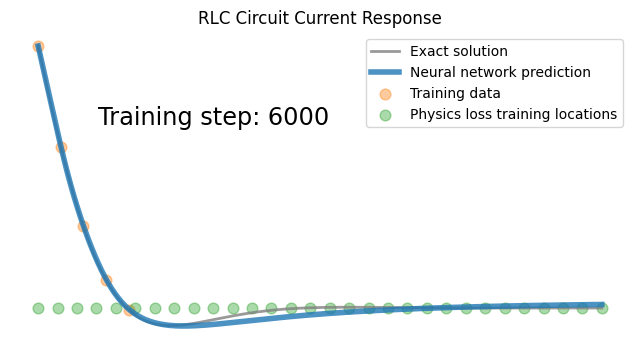

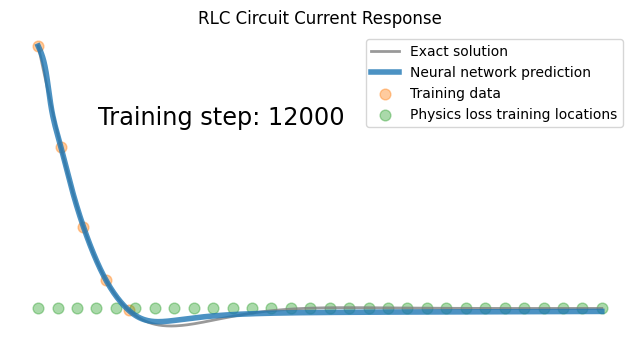

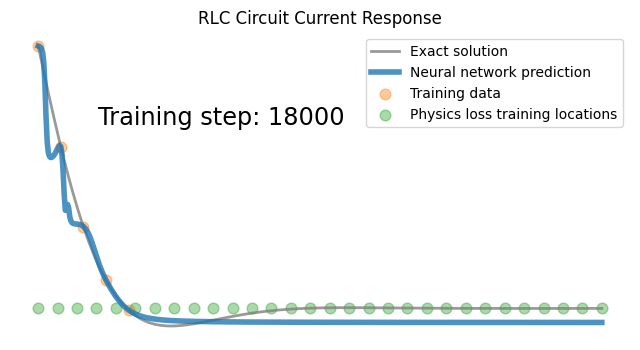

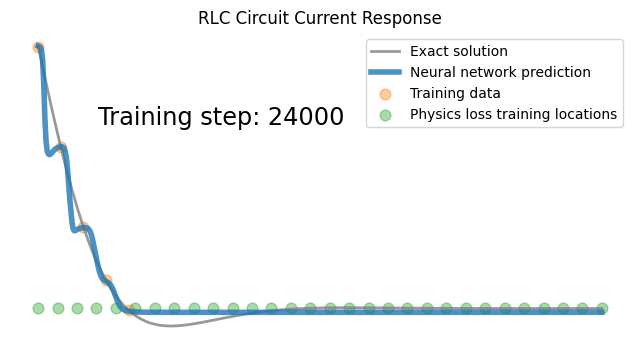

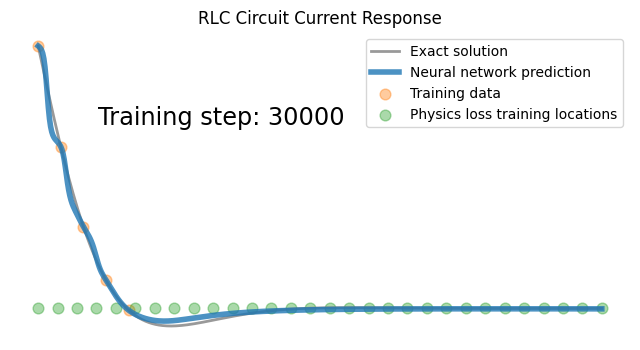

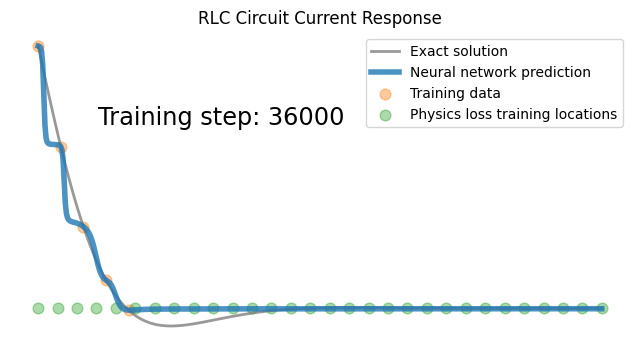

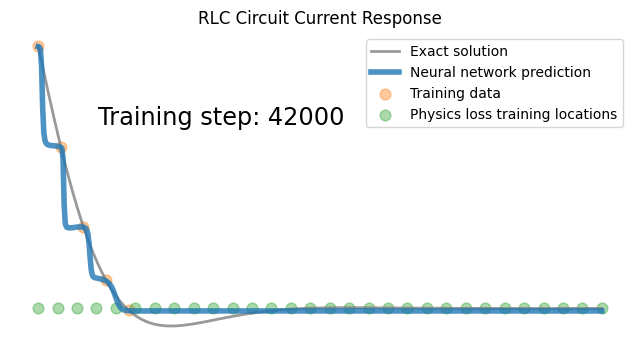

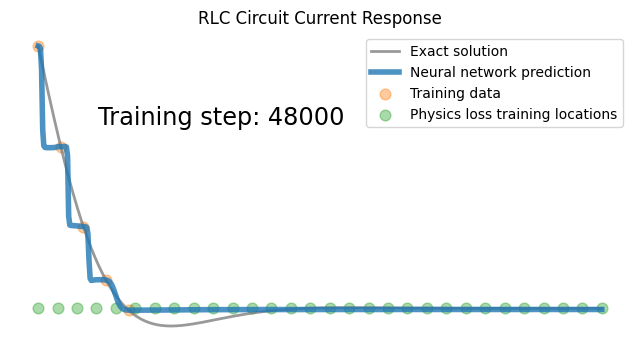

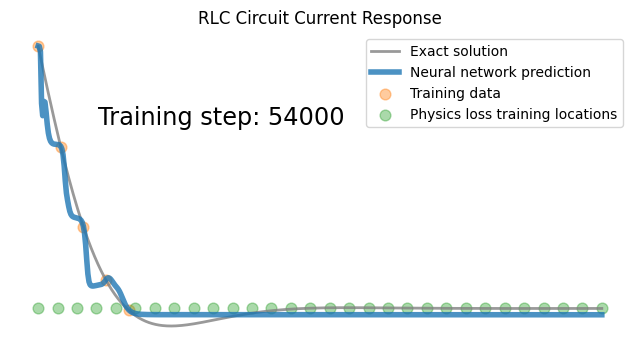

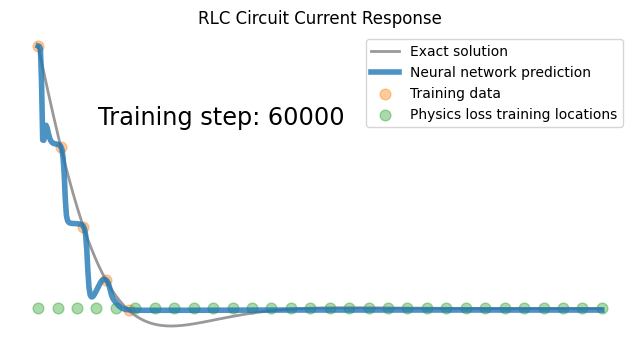

In [4]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

torch.manual_seed(123)

model = FCN(1, 1, 32, 3)
loss_fn = nn.MSELoss()
# Testing with 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)  
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()

> Learning Rate = 1e-4

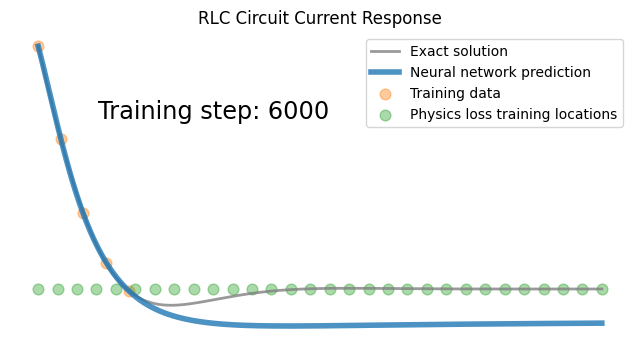

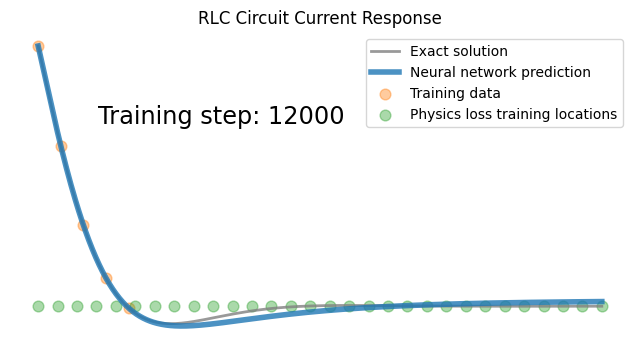

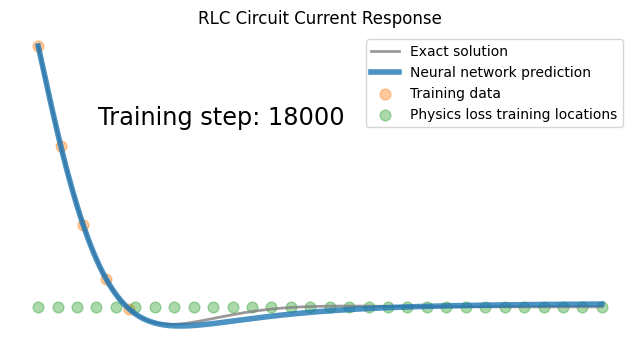

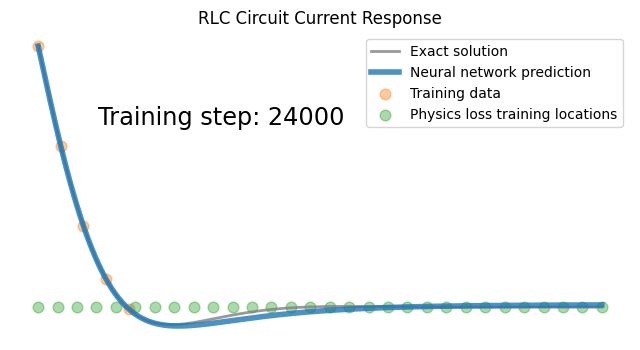

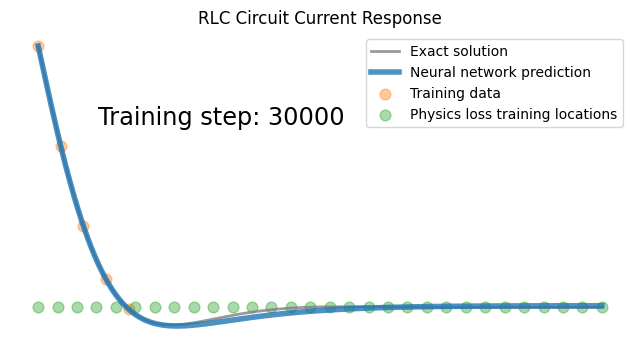

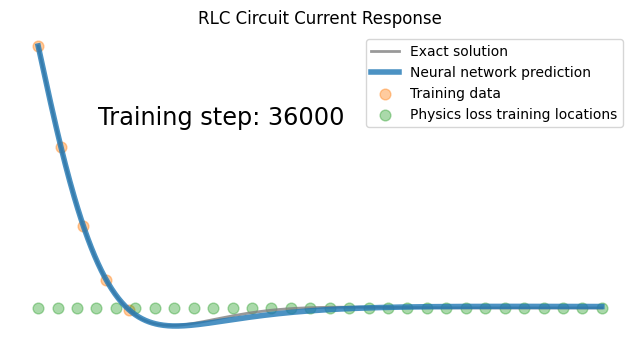

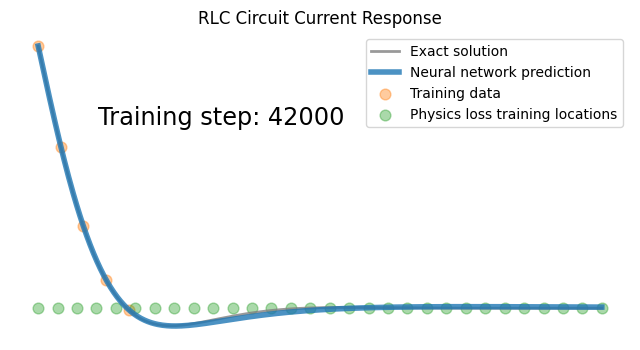

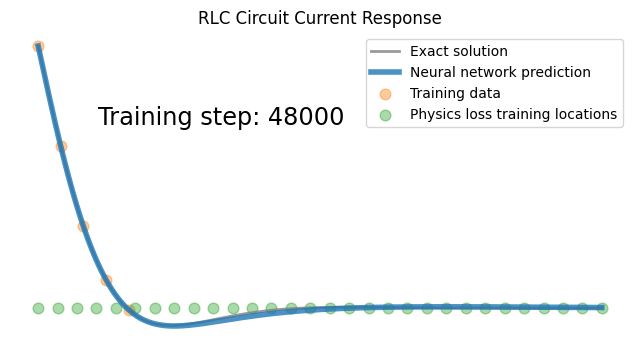

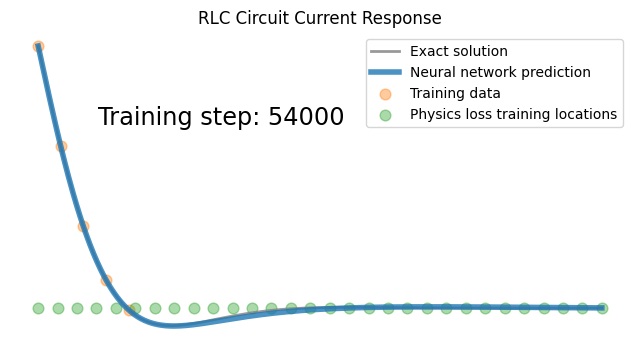

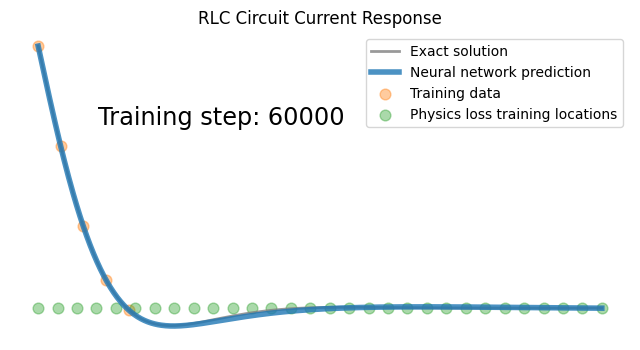

In [5]:
t_physics = torch.linspace(0, 10, 30).view(-1,1).requires_grad_(True) 

R, L, C = 2.0, 1.0, 0.5
alpha = R / (2 * L)
omega_0 = 1 / np.sqrt(L * C)

mu, k = 2 * alpha, omega_0**2

torch.manual_seed(123)

model = FCN(1, 1, 32, 3)
loss_fn = nn.MSELoss()
# Testing with 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for i in range(60000):
    optimizer.zero_grad()
    
    Ih = model(t_data) 
    loss1 = loss_fn(Ih, I_data)  
    
    Ihp = model(t_physics)
    dx  = torch.autograd.grad(Ihp, t_physics, torch.ones_like(Ihp), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx,  t_physics, torch.ones_like(dx), create_graph=True)[0]

    physics = L * dx2 + R * dx + (1 / C) * Ihp
    loss2 = (1e-4) * torch.mean(physics**2)  
    
    loss = loss1 + loss2  
    loss.backward()
    optimizer.step()
    
    if (i + 1) % 6000 == 0:
        Ih = model(t).detach()
        tp = t_physics.detach()
        plot_result(t, I, t_data, I_data, Ih, i+1, tp)
        plt.show()

### Inference

* Abnormal Behavior is observed showing significantly different results as compared to NN

- Similar Generalization, Accuracy, Convergence when decreasing lr(1e-4).
- Strange variations are observed, especially in the leftmost region, where the model correctly predicts the training points, but abnormal graph variations are noted elsewhere. (1e-2)